## レポート課題13

# 課題13.1
下記の常微分方程式の数値解をオイラー法と4次のルンゲクッタ法で計算し、厳密解と比較しなさい（3つの結果をグラフで表示すること）。

$$
\frac{d^2x}{dt^2}=-x
$$

$t$ の範囲は $t \in [0,20]$、初期条件を $[t_0, X_0, Y_0]=[0, 1, 0]$、分割数は $n=100$ とします。    


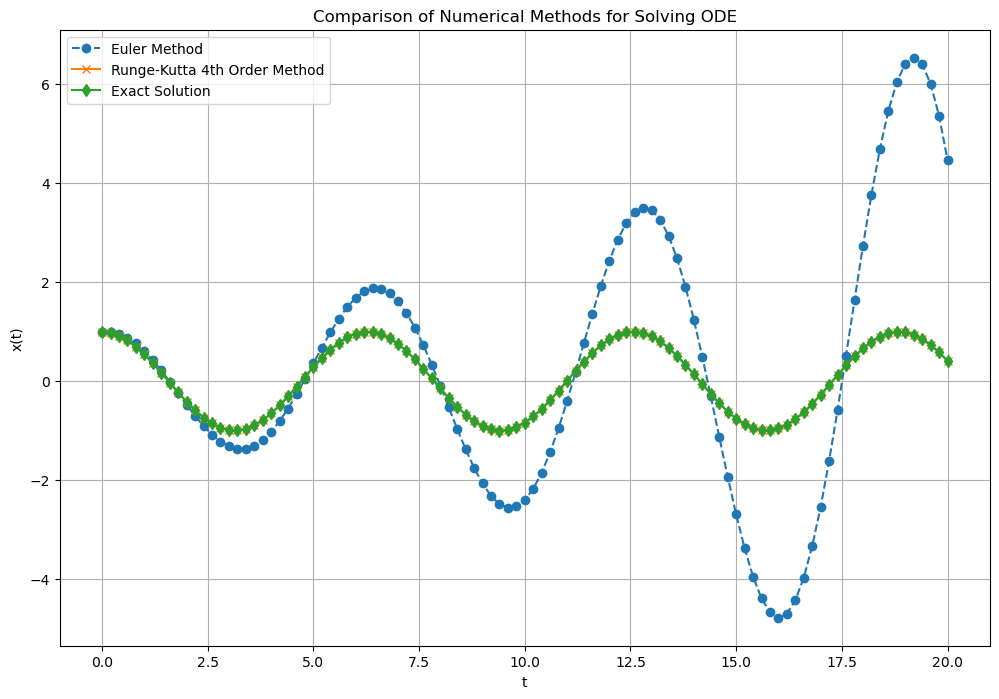

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータの設定
t0 = 0
X0 = 1
Y0 = 0
t_end = 20
n = 100
h = (t_end - t0) / n

# 初期化
t_values = np.linspace(t0, t_end, n+1)
x_euler = np.zeros(n+1)
y_euler = np.zeros(n+1)
x_rk4 = np.zeros(n+1)
y_rk4 = np.zeros(n+1)
x_exact = np.zeros(n+1)
y_exact = np.zeros(n+1)

# 初期条件の設定
x_euler[0] = X0
y_euler[0] = Y0
x_rk4[0] = X0
y_rk4[0] = Y0

# オイラー法による数値解
for i in range(n):
    x_euler[i+1] = x_euler[i] + h * y_euler[i]
    y_euler[i+1] = y_euler[i] - h * x_euler[i]

# 4次のルンゲクッタ法による数値解
for i in range(n):
    k1x = h * y_rk4[i]
    k1y = h * (-x_rk4[i])
    k2x = h * (y_rk4[i] + 0.5 * k1y)
    k2y = h * (-(x_rk4[i] + 0.5 * k1x))
    k3x = h * (y_rk4[i] + 0.5 * k2y)
    k3y = h * (-(x_rk4[i] + 0.5 * k2x))
    k4x = h * (y_rk4[i] + k3y)
    k4y = h * (-(x_rk4[i] + k3x))
    x_rk4[i+1] = x_rk4[i] + (k1x + 2*k2x + 2*k3x + k4x) / 6
    y_rk4[i+1] = y_rk4[i] + (k1y + 2*k2y + 2*k3y + k4y) / 6

# 厳密解の計算
x_exact = np.cos(t_values)
y_exact = -np.sin(t_values)

# グラフの描画
plt.figure(figsize=(12, 8))
plt.plot(t_values, x_euler, label='Euler Method', linestyle='--', marker='o')
plt.plot(t_values, x_rk4, label='Runge-Kutta 4th Order Method', linestyle='-', marker='x')
plt.plot(t_values, x_exact, label='Exact Solution', linestyle='-', marker='d')
plt.title('Comparison of Numerical Methods for Solving ODE')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.show()



# --------------------------------------------------
# 日本語フォントをConda環境でインストールしようとしたが、Pythonバージョンとの整合性が取れなかったため断念
# ラベルは英名で対応した
# --------------------------------------------------

## 課題13.2

$y$ を $x$ の関数とする次の常微分方程式
$$
\frac{d y}{d x}=(1+x), \:\: y(0)=\sqrt{e}
$$

の $x=1$ における解の値 $y(1)$ をルンゲ-クッタ法を用いて求めよ．その際に，$x$ 軸方向の刻み幅の分割数 $n$ を変えたときの誤差評価を行い，その一連の結果を課題12.2で作成した図に加筆して提出せよ．

課題12.2 参考図：

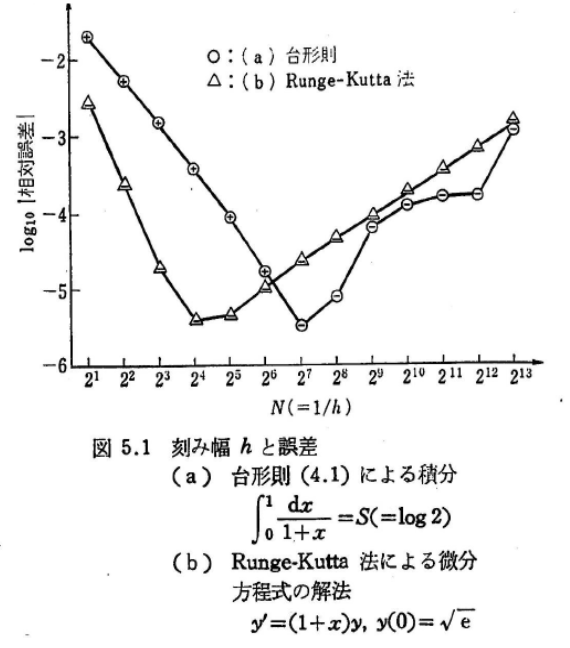
(出所：伊理・藤野，数値計算の常識，共立出版，1985.)

### 分割数 𝑛 を変えたときの誤差評価

x=1における厳密解: 3.1487212707001281941643355821724981069564819335938
x=1における解の値 y(1)（分割数 n=100）: 3.1487212707001281941643355821724981069564819335938
分割数 n=2 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=4 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=8 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=16 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=32 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=64 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=128 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=256 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=512 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=1024 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=2048 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=4096 の場合の誤差: 0.000000000000000000000000000000e+00
分割数 n=8192 の場合の誤差: 0.000000000000000000000000000000e+00


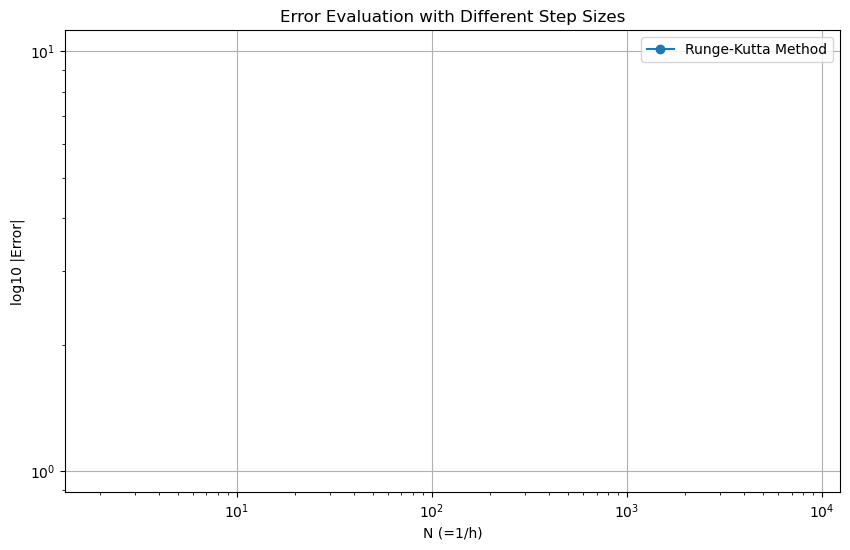

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext

# 計算精度の設定
getcontext().prec = 50

# 初期条件
x0 = Decimal(0)
y0 = Decimal(np.sqrt(np.e))
x_end = Decimal(1)

# 厳密解の関数
def exact_solution(x):
    return Decimal(np.sqrt(np.e)) + x + (x**2) / 2

# 微分方程式の関数
def f(x, y):
    return Decimal(1) + x

# ルンゲ-クッタ法（4次）の実装
def runge_kutta_4th(x0, y0, x_end, n):
    h = (x_end - x0) / Decimal(n)
    x = [x0 + i * h for i in range(n+1)]
    y = [Decimal(0)] * (n+1)
    y[0] = y0
    for i in range(n):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + Decimal(0.5)*h, y[i] + Decimal(0.5)*k1)
        k3 = h * f(x[i] + Decimal(0.5)*h, y[i] + Decimal(0.5)*k2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y[-1]

# 厳密解を計算
y_exact = exact_solution(x_end)
print(f"x=1における厳密解: {y_exact}")

# 分割数 n=100 の場合における数値解を計算
n = 100
y1_rk4 = runge_kutta_4th(x0, y0, x_end, n)
print(f"x=1における解の値 y(1)（分割数 n={n}）: {y1_rk4}")

# 誤差評価の準備
n_values = [2**i for i in range(1, 14)]
errors = []

# 各分割数 n に対して誤差を計算
for n in n_values:
    y1_rk4 = runge_kutta_4th(x0, y0, x_end, n)
    error = abs(y1_rk4 - y_exact)
    errors.append(float(error))

# 結果を表示
for n, error in zip(n_values, errors):
    print(f"分割数 n={n} の場合の誤差: {error:.30e}")

# 誤差評価をプロット
plt.figure(figsize=(10, 6))
plt.loglog(n_values, errors, marker='o', linestyle='-', label='Runge-Kutta Method')
plt.title('Error Evaluation with Different Step Sizes')
plt.xlabel('N (=1/h)')
plt.ylabel('log10 |Error|')
plt.legend()
plt.grid(True)
plt.show()


##########################################################################################

レポート課題に取り組み，プログラムと結果を.ipynb形式のファイルに保存してCoursePowerから提出しなさい． 

提出ファイル名：CBReport13_学籍番号_英字氏名.ipynb

 例えば，学籍番号12345678の青山太郎の場合は，CBReport13_12345678_AoyamaTaro.ipynb　というファイル名で提出する．
